# Mumbai Cars Info Extraction

In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [4]:
url = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Aford&sort=bestmatch&serveWarrantyCount=true&gaId=81591696.1720131812&storeCityId=2378'

mumbai_cars = requests.get(url)

soup = BeautifulSoup(mumbai_cars.content, 'html.parser')

In [5]:
model = soup.find_all('div', class_ = '_2YB7p')

In [6]:
len(model)

13

In [7]:
models = []
fuel_type = []
kms_used = []
car_type = []
service = []
emi = []
price = []
location = []

In [46]:
# for i in range(len(model)):
#     models.append(model[i].find('h3', class_ = '_11dVb')).text
#     fuel_type.append(model[i].find_all('li')[2].get_text())
#     kms_used.append(model[i].find_all('li')[0].get_text())
#     car_type.append(model[i].find_all('li')[4].get_text())
#     service.append(model[i].find('span', class_ = '_JoYA')[].get_text())
#     emi.append(model[i].find('span', class_ = '_2O0yU').get_text())
#     price.append(model.[i].find('strong', class_ = '_3RL-I').get_text())

In [8]:
for i in model:
    models.append(i.find('h3',class_ = '_11dVb').text),
    kms_used.append(i.find_all('li')[0].text),
    fuel_type.append(i.find_all('li')[2].text),
    car_type.append(i.find_all('li')[4].text),
    service.append(i.find('span', class_ = '_3JoYA').text),
    emi.append(i.find('span', class_ = '_2O0yU').text),
    price.append(i.find('strong', class_ = '_3RL-I').text),
    location.append('Mumbai')

# New Delhi Cars Info Extraction

In [9]:
url1 = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Aford&sort=bestmatch&serveWarrantyCount=true&gaId=81591696.1720131812&storeCityId=2'

delhi_cars = requests.get(url1)

soup1 = BeautifulSoup(delhi_cars.content, 'html.parser')

In [10]:
model1 = soup1.find_all('div', class_ = '_2YB7p')

In [11]:
len(model1)

20

In [12]:
for i in model1:
    models.append(i.find('h3',class_ = '_11dVb').text),
    kms_used.append(i.find_all('li')[0].text),
    fuel_type.append(i.find_all('li')[2].text),
    car_type.append(i.find_all('li')[4].text),
    service.append(i.find('span', class_ = '_3JoYA').text),
    emi.append(i.find('span', class_ = '_2O0yU').text),
    price.append(i.find('strong', class_ = '_3RL-I').text),
    location.append('New Delhi')

# Creating the DataFrame

In [13]:
dict1 = {'Year': models, 'KM':kms_used, 'Fuel': fuel_type, 'Transmission': car_type, 'Feature':service, 'EMI_per_month':emi, 'Price':price, 'Location':location}

In [14]:
data = pd.DataFrame(dict1)

In [15]:
data.head()

,Year,KM,Fuel,Transmission,Feature,EMI_per_month,Price,Location
0,2017 Ford Ecosport TREND 1.5L PETROL,"27,102 km",Petrol,Manual,100% Tyre Life,"EMIs from ₹11,476/month",₹5.87 Lakh,Mumbai
1,2015 Ford Ecosport TITANIUM 1.5L PETROL,"45,779 km",Petrol,Manual,Reg. Serviced,"EMIs from ₹8,348/month",₹4.27 Lakh,Mumbai
2,2017 Ford Ecosport TITANIUM + 1.5L DIESEL,"79,659 km",Diesel,Manual,Reg. Serviced,"EMIs from ₹12,747/month",₹6.52 Lakh,Mumbai
3,2018 Ford FREESTYLE TREND 1.2 PETROL,"33,314 km",Petrol,Manual,Alloy Wheels,"EMIs from ₹9,013/month",₹4.61 Lakh,Mumbai
4,2015 Ford Ecosport TITANIUM 1.5L PETROL AT,"43,187 km",Petrol,Automatic,Spl. Reg. No.,"EMIs from ₹10,010/month",₹5.12 Lakh,Mumbai


In [16]:
data.to_csv('Cars24_web_scrap.csv', index = False)

# Expolatory Data Analysis

In [17]:
data.shape

(33, 8)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           33 non-null     object
 1   KM             33 non-null     object
 2   Fuel           33 non-null     object
 3   Transmission   33 non-null     object
 4   Feature        33 non-null     object
 5   EMI_per_month  33 non-null     object
 6   Price          33 non-null     object
 7   Location       33 non-null     object
dtypes: object(8)
memory usage: 2.2+ KB


In [19]:
data.isna().sum()

Year             0
KM               0
Fuel             0
Transmission     0
Feature          0
EMI_per_month    0
Price            0
Location         0
dtype: int64

In [20]:
data.describe()

,Year,KM,Fuel,Transmission,Feature,EMI_per_month,Price,Location
count,33,33,33,33,33,33,33,33
unique,26,33,2,2,8,33,32,2
top,2019 Ford Ecosport TITANIUM 1.5L DIESEL,"27,102 km",Petrol,Manual,Top Model,"EMIs from ₹11,476/month",₹6.88 Lakh,New Delhi
freq,3,1,21,26,14,1,2,20


In [21]:
data.sample(5)

,Year,KM,Fuel,Transmission,Feature,EMI_per_month,Price,Location
7,2016 Ford Ecosport TITANIUM 1.5L PETROL,"56,500 km",Petrol,Manual,Top Model,"EMIs from ₹9,716/month",₹4.97 Lakh,Mumbai
30,2017 Ford Ecosport TREND + 1.5L PETROL,"55,052 km",Petrol,Manual,Reg. Serviced,"EMIs from ₹9,736/month",₹4.98 Lakh,New Delhi
16,2018 Ford Ecosport TITANIUM 1.5L PETROL,"99,291 km",Petrol,Manual,Top Model,"EMIs from ₹11,527/month",₹5.90 Lakh,New Delhi
10,2020 Ford Ecosport TITANIUM + 1.5L DIESEL,"65,037 km",Diesel,Manual,Top Model,"EMIs from ₹17,150/month",₹9.01 Lakh,Mumbai
14,2016 Ford Ecosport TITANIUM+ 1.0L ECOBOOST,"29,475 km",Petrol,Manual,Top Model,"EMIs from ₹12,043/month",₹6.16 Lakh,New Delhi


# UPDATE AS OF 05.07 BY RISHI & SHANMUGAM

In [22]:
cars = pd.DataFrame()

In [23]:
cars = data[['KM','Year','Fuel','Transmission','Price']]

In [25]:
cars.head()

,KM,Year,Fuel,Transmission,Price
0,"27,102 km",2017 Ford Ecosport TREND 1.5L PETROL,Petrol,Manual,₹5.87 Lakh
1,"45,779 km",2015 Ford Ecosport TITANIUM 1.5L PETROL,Petrol,Manual,₹4.27 Lakh
2,"79,659 km",2017 Ford Ecosport TITANIUM + 1.5L DIESEL,Diesel,Manual,₹6.52 Lakh
3,"33,314 km",2018 Ford FREESTYLE TREND 1.2 PETROL,Petrol,Manual,₹4.61 Lakh
4,"43,187 km",2015 Ford Ecosport TITANIUM 1.5L PETROL AT,Petrol,Automatic,₹5.12 Lakh


### Used lambda function to configure the rows, so that it would be easy for analysis.

In [26]:
cars.KM = cars.KM.apply(lambda x: x.split()[0])
cars.Year = cars.Year.apply(lambda x: x.split()[0])
cars.Price = cars.Price.apply(lambda x: x.split()[0])

C:\Users\RISHI MISHRA\AppData\Local\Temp\ipykernel_20160\174147318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.KM = cars.KM.apply(lambda x: x.split()[0])
C:\Users\RISHI MISHRA\AppData\Local\Temp\ipykernel_20160\174147318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.Year = cars.Year.apply(lambda x: x.split()[0])
C:\Users\RISHI MISHRA\AppData\Local\Temp\ipykernel_20160\174147318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [27]:
cars.head(3)

,KM,Year,Fuel,Transmission,Price
0,"27,102",2017,Petrol,Manual,₹5.87
1,"45,779",2015,Petrol,Manual,₹4.27
2,"79,659",2017,Diesel,Manual,₹6.52


In [28]:
cars.dtypes

KM              object
Year            object
Fuel            object
Transmission    object
Price           object
dtype: object

### Removed symbols present in the values to convert the datatype which would result in better analysis.

In [29]:
cars.KM = cars.KM.str.replace(',','')
cars.Price = cars.Price.str.replace('₹', '')

C:\Users\RISHI MISHRA\AppData\Local\Temp\ipykernel_20160\3453451639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.KM = cars.KM.str.replace(',','')
C:\Users\RISHI MISHRA\AppData\Local\Temp\ipykernel_20160\3453451639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.Price = cars.Price.str.replace('₹', '')


In [30]:
cars[['KM','Year','Price']] = cars[['KM','Year','Price']].astype(float)

C:\Users\RISHI MISHRA\AppData\Local\Temp\ipykernel_20160\2852736351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars[['KM','Year','Price']] = cars[['KM','Year','Price']].astype(float)


# **VISUALIZATIONS**

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
cars.sample(3)

,KM,Year,Fuel,Transmission,Price
24,59781.0,2018.0,Petrol,Automatic,6.88
5,30825.0,2019.0,Petrol,Manual,7.66
21,96027.0,2018.0,Diesel,Manual,6.18


<Axes: title={'center': 'Histogram of Kilometers driven'}, xlabel='KM', ylabel='Count'>

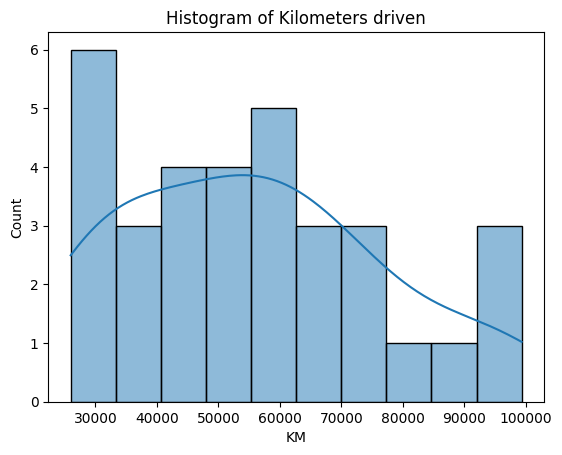

In [33]:
# Histogramplot

plt.title('Histogram of Kilometers driven')
sns.histplot(cars.KM, bins=10, kde=True)

## Count Plot

<Axes: title={'center': 'Car Counts by Year'}, xlabel='Year', ylabel='count'>

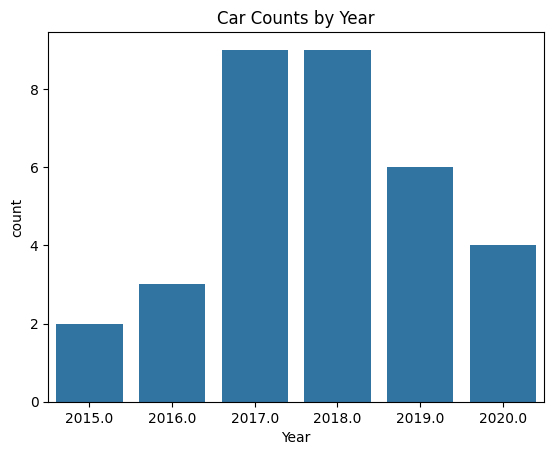

In [34]:
plt.title("Car Counts by Year")
sns.countplot(data = cars, x='Year')

In [73]:
# From the result we could see that the cars manufactured in 2017 was present in our dataset more whereas 2019 and 2020 secures the least.

<Axes: xlabel='Transmission', ylabel='count'>

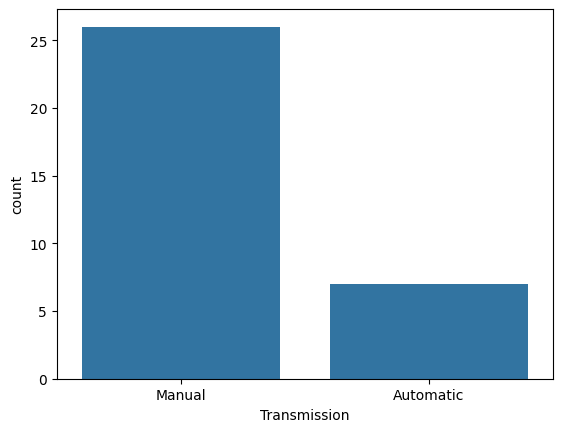

In [35]:
sns.countplot(data = cars, x='Transmission')

In [36]:
cars.groupby(['Transmission','Fuel']).mean()

KM         Year     Price
Transmission Fuel                                       
Automatic    Petrol  56755.714286  2017.285714  6.561429
Manual       Diesel  68060.000000  2018.500000  7.020000
             Petrol  44011.642857  2017.428571  5.756429

In [76]:
# The count plot explains that except 2 cars everthing else comes with MANUAL transmission.
# That 2 cars with AUTOMATIC transmission has PETROL fueltype.

## Distribution Plot

<Axes: title={'center': 'Fuel Type Distribution'}, ylabel='count'>

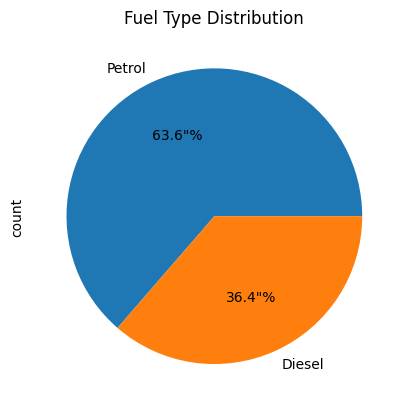

In [37]:
plt.title("Fuel Type Distribution")
cars.Fuel.value_counts().plot(kind='pie',autopct='%1.1f"%%')

In [78]:
# As we can see above that the majority of cars, precisely(61.5%) belongs to "petrol" when it comes to fueltype.

## Scatter Plot

<Axes: xlabel='KM', ylabel='Price'>

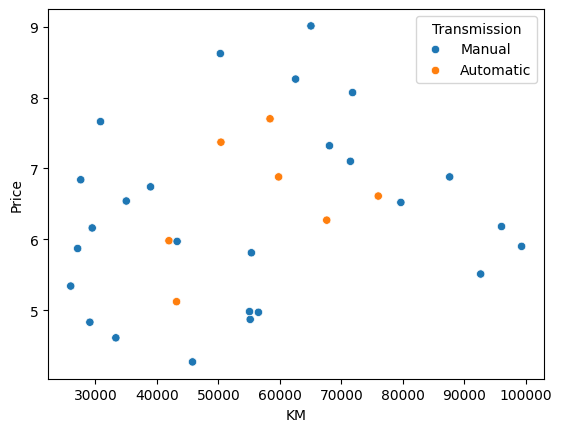

In [38]:
sns.scatterplot(data = cars, x='KM', y='Price', hue='Transmission')

In [80]:
# The x axis represents the Kilometer driven by car and y axis represents the price of that car.
# Blue color represents the Manual tranmission and Orange represents the Automatic.
# No pattern or trend can be found between the variables since cars that were driven around 39k km and 89k both were at price around 7l.

# **CONCLUSION**
##The dataset shows that most cars were manufactured in ***2017***, and majority use ***manual*** transmission and ***petrol*** fuel. The scatter plot shows that there isn't a straightforward relationship between how many kilometers a car has been driven and its price since cars with both low and high KM have similar prices.